In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from IPython.display import display
%matplotlib inline

,number_courses,Marks,time_study
count,100.000000,100.000000,100.000000
mean,5.290000,24.417690,22.434030
std,1.799523,14.326199,16.692231
min,3.000000,5.609000,0.384000
25%,4.000000,12.633000,9.567750
50%,5.000000,20.059500,18.763000
75%,7.000000,36.676250,31.468000
max,8.000000,55.299000,62.488000


PearsonRResult(statistic=0.942253890364054, pvalue=2.355657179844177e-48)


<Axes: title={'center': 'Relationship between Average Study Time Marks'}, xlabel='time_study_avg', ylabel='Marks'>

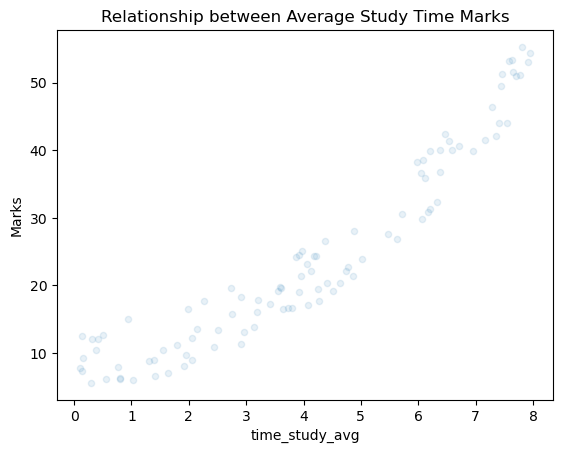

In [5]:
df = pd.read_csv('time_study_data.csv')
display(df.describe()) 
df.head(10)

time_study_avg = df['time_study']/df['number_courses']
df.loc[:, 'time_study_avg'] = time_study_avg
df.drop(['time_study'], axis=1, inplace=True)
df.head(10)

correlation_coefficient = ss.pearsonr(df['time_study_avg'], df['Marks'])
print(correlation_coefficient)

df.plot(kind="scatter", x="time_study_avg", y="Marks", title="Relationship between Average Study Time Marks", alpha=0.1)

In [8]:

# Linear Mmodel Prediction
def linearModelPredict(b,X):
    
    yp = np.dot(X,b)

    return yp


# Definte the loss RSS
def linearModelLossRSS(beta,X,y):
    # Calculate the predicted values
    yp = linearModelPredict(beta,X)
    
    # Calculate the residuals
    res = yp - y
    
    # Calculate the RSS
    RSS = np.sum(res**2)

    # Get the gradient
    gradient = 2 * np.dot(X.T,res)
    
    return (RSS,gradient)



# Define the loss function as a LAD
def linearModelLossLAD(beta,X,y):
    # Calculate the predicted values
    yp = linearModelPredict(beta,X)
    
    # Calculate the residuals
    res = yp - y
    
    # Calculate the RSS
    LAD = np.sum(abs(res))

    # Get the gradient
    gradient = np.dot(X.T,np.sign(res))
    
    return (LAD,gradient)


# Define the linear model
def linearModelFit(X,y,lossfcn):
    bstart=[0,0]

    res=so.minimize(lossfcn,bstart,args=(X, y),jac=True)

    b = res.x

    rss, gradient = linearModelLossRSS(b,X,y)

    # Calculate TSS
    y_mean = np.mean(y)
    tss = np.sum((y - y_mean) ** 2)

    # Calculate R-squared
    r_squared = 1 - (rss / tss)
    
    return b, r_squared

## Linear Loss Model Residuals Sum of Squares

Parameters:  [1.22385811 5.68875042] R^2 0.8878423939061949


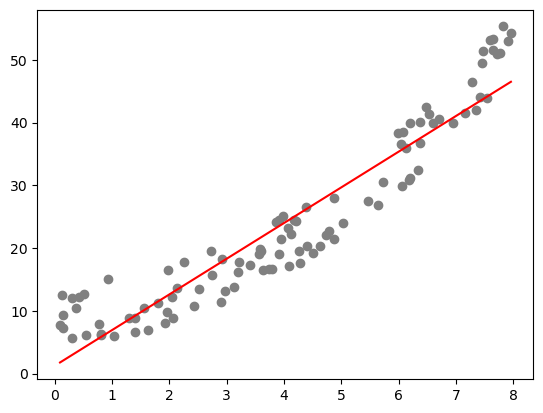

In [7]:
N=df['time_study_avg'].size
X = np.c_[np.ones(N), df['time_study_avg'] ] 
y = df['Marks'].values
b, r_squared = linearModelFit(X,y,linearModelLossRSS)

print("Parameters: ", b, "R^2", r_squared)

x_grid = np.linspace(X[:,1].min(), X[:,1].max(),100) # get grid
Xn = np.c_[np.ones(x_grid.size), x_grid] # Make Design
yp=linearModelPredict(b,Xn) # get prediction
plt.scatter(X[:,1], y, color = 'grey')
plt.plot(Xn[:,1], yp, color = 'red')
plt.xlabel('Average Study Time')
plt.ylabel('Marks')
plt.title('Linear Model Fit Marks vs Average Study Time')
plt.show()

## Linear Loss Model Least Absolute Deviations

Parameters:  [0.69032702 5.73554686] R^2 0.8872041903110367


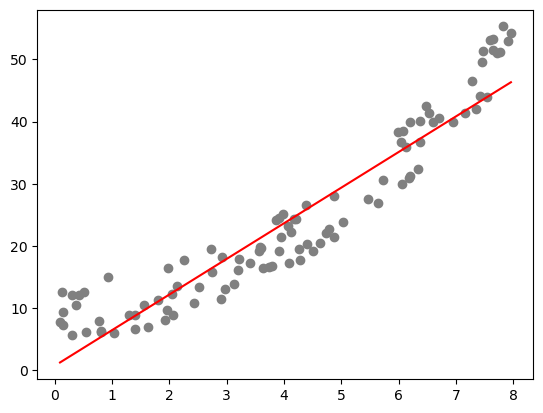

In [9]:
b, r_squared = linearModelFit(X,y,linearModelLossLAD)

print("Parameters: ", b, "R^2", r_squared)

x_grid = np.linspace(X[:,1].min(), X[:,1].max(),100) # get grid
Xn = np.c_[np.ones(x_grid.size), x_grid] # Make Design
yp=linearModelPredict(b,Xn) # get prediction
plt.scatter(X[:,1], y, color = 'grey')
plt.plot(Xn[:,1], yp, color = 'red')
plt.xlabel('Average Study Time')
plt.ylabel('Marks')
plt.title('Linear Model Fit Marks vs Average Study Time')
plt.show()

## Cooefficients Bias and r_squared value

In [10]:
from sklearn import linear_model, metrics
reg = linear_model.LinearRegression()

X = np.c_[np.ones(N), df['number_courses'], df['time_study_avg'] ]
y = df['Marks'].values
reg.fit(X, y)
print(f'coefficients:', reg.coef_)
print(f'Intercept / bias: ', reg.intercept_)
print(f'r_sqr value: {reg.score(X, y)}')

coefficients: [0.         1.86405074 5.39917879]
Intercept / bias:  -7.456346231178355
r_sqr value: 0.9403656320238896
